# Logistic Regression with non-linear features

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [2]:
fname_data_train    = 'assignment_10_data_train.csv'
fname_data_test     = 'assignment_10_data_test.csv'

data_train          = np.genfromtxt(fname_data_train, delimiter=',')
data_test           = np.genfromtxt(fname_data_test, delimiter=',')

number_data_train   = data_train.shape[0]
number_data_test    = data_test.shape[0]

data_train_point    = data_train[:, 0:2]
data_train_point_x  = data_train_point[:, 0]
data_train_point_y  = data_train_point[:, 1]
data_train_label    = data_train[:, 2]

data_test_point     = data_test[:, 0:2]
data_test_point_x   = data_test_point[:, 0]
data_test_point_y   = data_test_point[:, 1]
data_test_label     = data_test[:, 2]

data_train_label_class_0    = (data_train_label == 0)
data_train_label_class_1    = (data_train_label == 1)

data_test_label_class_0     = (data_test_label == 0)
data_test_label_class_1     = (data_test_label == 1)

data_train_point_x_class_0  = data_train_point_x[data_train_label_class_0]
data_train_point_y_class_0  = data_train_point_y[data_train_label_class_0]

data_train_point_x_class_1  = data_train_point_x[data_train_label_class_1]
data_train_point_y_class_1  = data_train_point_y[data_train_label_class_1]

data_test_point_x_class_0   = data_test_point_x[data_test_label_class_0]
data_test_point_y_class_0   = data_test_point_y[data_test_label_class_0]

data_test_point_x_class_1   = data_test_point_x[data_test_label_class_1]
data_test_point_y_class_1   = data_test_point_y[data_test_label_class_1]

print('shape of point in train data = ', data_train_point.shape)
print('shape of point in test data = ', data_train_point.shape)

print('shape of label in train data = ', data_test_label.shape)
print('shape of label in test data = ', data_test_label.shape)

print('data type of point x in train data = ', data_train_point_x.dtype)
print('data type of point y in train data = ', data_train_point_y.dtype)

print('data type of point x in test data = ', data_test_point_x.dtype)
print('data type of point y in test data = ', data_test_point_y.dtype)


shape of point in train data =  (500, 2)
shape of point in test data =  (500, 2)
shape of label in train data =  (500,)
shape of label in test data =  (500,)
data type of point x in train data =  float64
data type of point y in train data =  float64
data type of point x in test data =  float64
data type of point y in test data =  float64


## plot the data

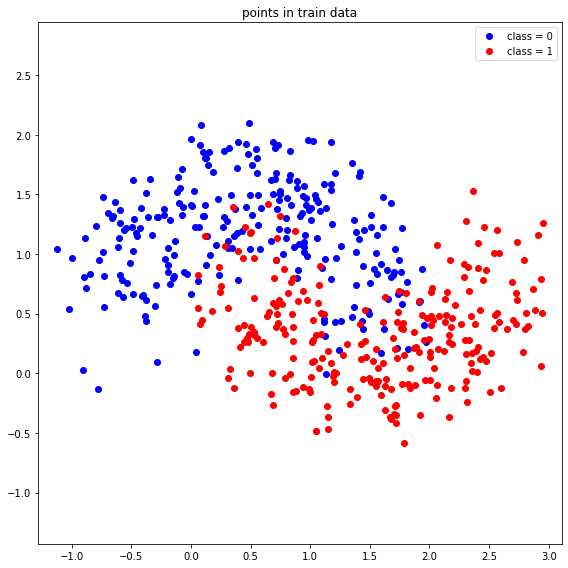

In [3]:
f = plt.figure(figsize=(8,8))   

plt.title('points in train data')
plt.plot(data_train_point_x_class_0, data_train_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data_train_point_x_class_1, data_train_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

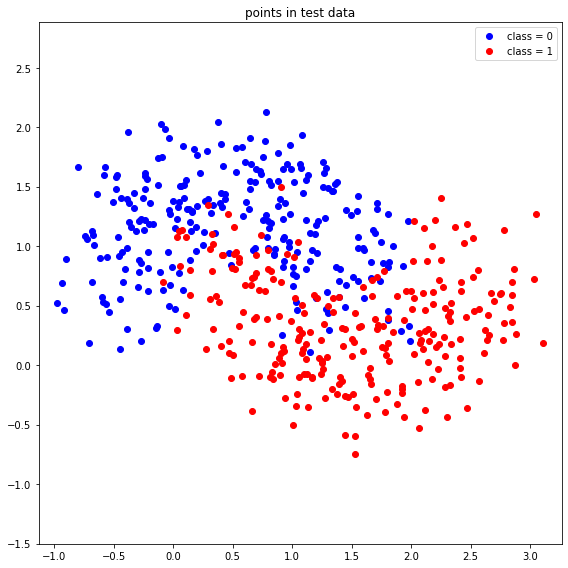

In [4]:
f = plt.figure(figsize=(8,8))   

plt.title('points in test data')
plt.plot(data_test_point_x_class_0, data_test_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data_test_point_x_class_1, data_test_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the feature functions

- feature vector is defined by $(1, f_1(x, y), f_2(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [42]:
def compute_feature(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    len_point = len(point)
    x= point[:, 0]
    y = point[:, 1]
    feature = (np.ones(len(point)) , x , np.power(x,2) , np.power(x,3),np.power(x,4),np.power(x,5),y,np.power(y,2),np.power(y,3),np.power(y,4),np.power(y,5))
    #feature = (1 , x[0] , pow(x[0],2) , pow(x[0],3),pow(x[0],4),pow(x[0],5),y,pow(y[0],2),pow(y[0],3),pow(y[0],4),pow(y[0],5))
    #for i in range(1,len(point)):
        #k = (1 , x[i] , pow(x[i],2) , pow(x[i],3),pow(x[i],4),pow(x[i],5),y,pow(y[i],2),pow(y[i],3),pow(y[i],4),pow(y[i],5))
        #feature = np.vstack([feature,k])
    feature = np.array(feature)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return feature.shape #np.array(feature).shape
print(compute_feature(data_train_point))

(11, 500)


## define the linear regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature = $(1, f_1(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [6]:
def compute_linear_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = np.dot(theta,feature)
    

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return value
print(compute_linear_regression((1,1,1,1,1,1,1,1,1,1,1),compute_feature(data_train_point)))

[8.42838726e+00 8.81697833e+00 3.54505908e+01 5.76366828e+01
 8.67508628e+00 6.01979913e+01 2.62713130e+01 2.10389469e+01
 3.94306239e+01 2.16852526e+01 1.23553980e+01 3.54276787e+01
 3.23016297e+01 4.10289003e+01 1.11498872e+01 1.85593335e+01
 3.09079453e+01 1.09638921e+01 2.81811150e+01 1.87378776e+01
 1.18451466e+01 2.12085352e+01 8.69141184e+00 2.97417592e+01
 1.76296205e+01 1.52665753e+01 2.32807980e+01 5.92083377e+01
 3.62656710e+01 3.79146902e+01 3.38725980e+01 2.11528987e+01
 4.32079998e+01 2.68311353e+01 3.40396476e+01 2.37854729e+01
 3.10475568e+01 4.47887123e+01 1.10709395e+01 2.13265480e+01
 4.13685157e+01 5.41009788e+01 3.98159319e+01 5.50760818e+01
 1.63758711e+01 3.65039142e+01 4.82133720e+01 1.04066017e+01
 2.61857926e+01 2.40490187e+01 1.74968580e+01 1.73217065e+01
 1.47809909e+01 2.64332115e+01 1.26830172e+01 4.79040135e+01
 2.48768485e+01 7.90334974e+00 3.98050855e+01 7.28397695e+00
 2.88647857e+01 3.17617219e+01 2.76014322e+01 4.56855872e+01
 2.19172902e+01 2.456749

## define sigmoid function with input

- $z \in \mathbb{R}$

In [7]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = 1/(1+np.exp(-z))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$

In [8]:
def compute_logistic_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = sigmoid(compute_linear_regression(theta, feature))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value
print(compute_logistic_regression((1,1,1,1,1,1,1,1,1,1,1),compute_feature(data_train_point)))

[0.99978147 0.99985183 1.         1.         0.99982924 1.
 1.         1.         1.         1.         0.99999569 1.
 1.         1.         0.99998562 0.99999999 1.         0.99998268
 1.         0.99999999 0.99999283 1.         0.99983201 1.
 0.99999998 0.99999977 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.99998444 1.         1.         1.
 1.         1.         0.99999992 1.         1.         0.99996977
 1.         1.         0.99999997 0.99999997 0.99999962 1.
 0.9999969  1.         1.         0.99963063 1.         0.99931402
 1.         1.         1.         1.         1.         1.
 1.         1.         0.99998712 1.         0.99999998 1.
 0.99999428 1.         0.99999999 0.9999984  1.         1.
 1.         0.99997441 1.         0.99933481 1.         0.99998667
 1.         1.         1.         1.         0.99999599 1.
 1.         1.         0.99999693 1.         1.         1.
 1.         1.         1

## define the residual function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [9]:
def compute_residual(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    residual = -label*np.log(compute_logistic_regression(theta,feature))-(1-label)*np.log(1-compute_logistic_regression(theta,feature))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual
print(compute_residual((1,1,0,0,0,0,0,0,0,0,0),compute_feature(data_train_point),data_train_label).shape)

(500,)


## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [10]:
def compute_loss(theta, feature, label, alpha):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    loss = np.mean(-label*np.log(compute_logistic_regression(theta,feature))-(1-label)*np.log(1-compute_logistic_regression(theta,feature)))
    theta_array=np.array(theta)
    #loss =loss + (alpha/2)*np.sum(theta_array*theta_array)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss
print(compute_loss((1,1,0,0,0,0,0,0,0,0,0),compute_feature(data_train_point),data_train_label,10))

0.9240840620590525


## define the gradient of the loss with respect to the model parameter $\theta$

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [11]:
def compute_gradient(theta, feature, label, alpha):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    x= feature[:, 0]
    for i in range(1,len(label)):
        y = feature[:, i]
        x = np.vstack([x,y])
    k = np.dot(x.T,x)
    
    k1= k +(alpha/2)*np.identity(len(feature))
    k2 = k1.astype(float)
    t1 = np.linalg.inv(k2)
    t2=np.dot(t1,x.T)
    t3 = t2@label
    gradient = t3
    


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return t3
print(compute_gradient((1,1,0,0,0,0,0,0,0,0,0),compute_feature(data_train_point),data_train_label,10))

[ 0.74861043  0.40788989 -0.33299937 -0.17243006  0.21999806 -0.04460818
 -0.31261921 -0.16430568 -0.06776952  0.05953594  0.00214303]


## compute the accuracy of the prediction for point with a given model parameter

In [12]:
def compute_accuracy(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    t=compute_logistic_regression(theta, feature)
    count = 0
    lenz = len(label)
    for i in range(lenz):
        if t[i] <=np.mean(t):
            discrimination = 1
        else:
            discrimination =0
        if label[i] == discrimination:
            count +=1
        else:
            
            print(feature[1][i])
    accuracy = (count/lenz)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return accuracy
print(compute_accuracy((1,1,0,0,0,0,0,0,0,0,0),compute_feature(data_train_point),data_train_label))

0.5764375837923192
0.7146289946501772
0.735212770513911
0.6737746328401281
0.6849363436975785
0.481177031152253
0.586939294301335
0.6875569481495702
0.556407005871352
0.4572569393099631
0.15664576401933625
0.18372215880520965
0.02906228577745333
0.07133458889622246
0.7204241703635214
0.066212463158755
0.11974801946659322
0.7081178126384761
0.2124768161578892
0.2680914456045137
0.08538991134637887
0.7137491603237027
0.5104370695032588
0.7035882692580226
-0.22031671350615045
0.15495027059739752
0.5579503676193719
0.4826321312486773
0.3079165696205045
0.46435099689693404
0.5449025838431778
-0.06870576832028158
0.3831256904362392
0.730131315925129
0.3861570837978798
-0.13937169121849718
-0.07444922833890924
-0.07862848340298306
0.39221590011676843
0.09679826464019742
0.10219693476623826
0.667514398950939
0.496055872283637
0.33351411523543034
-0.000599042724758303
0.49876387056130617
0.27824584482615977
0.3203363506525174
0.12359662992123788
0.5575716475583559
-0.10570273694115612
0.0029022

## initialize the gradient descent algorithm

In [13]:
number_iteration    = 100 # you can change this value as you want 
learning_rate       = 0.001 # you can change this value as you want 
number_feature      = 11 # you can change this value as you want
alpha               = 1 # you can change this value as you want

theta                       = np.zeros(number_feature)
loss_iteration_train        = np.zeros(number_iteration)
loss_iteration_test         = np.zeros(number_iteration)
accuracy_iteration_train    = np.zeros(number_iteration)
accuracy_iteration_test     = np.zeros(number_iteration)

## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [29]:
for i in range(number_iteration):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    if i ==0:
        theta = (1,1,1,1,1,1,1,1,0.5,0.5,0.5)
    feature1 = compute_feature(data_train_point)# train
    feature2 = compute_feature(data_test_point)# test
    theta           = theta-learning_rate*compute_gradient(theta,feature1,data_train_label,alpha)
    loss_train      = compute_loss(theta,feature1,data_train_label,alpha)
    loss_test       = compute_loss(theta,feature2,data_test_label,alpha)
    accuracy_train  = compute_accuracy(theta,feature1,data_train_label)
    accuracy_test   = compute_accuracy(theta,feature2,data_test_label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    loss_iteration_train[i]     = loss_train
    loss_iteration_test[i]      = loss_test
    accuracy_iteration_train[i] = accuracy_train
    accuracy_iteration_test[i]  = accuracy_test

theta_optimal = theta

C:\Users\hajee\AppData\Local\Temp\ipykernel_10004\2018313558.py:7: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-label*np.log(compute_logistic_regression(theta,feature))-(1-label)*np.log(1-compute_logistic_regression(theta,feature)))
C:\Users\hajee\AppData\Local\Temp\ipykernel_10004\2018313558.py:7: RuntimeWarning: invalid value encountered in multiply
  loss = np.mean(-label*np.log(compute_logistic_regression(theta,feature))-(1-label)*np.log(1-compute_logistic_regression(theta,feature)))


-0.22031671350615045
0.12359662992123788
0.23677645749072496
0.05835460497264611
-0.5142232018004456
-0.8511454224410286
-0.029858297659406174
-0.15167478922337574
-0.5801149332908034
0.3925785804441957
-0.38618574497821456
-0.37628895295728626
-0.4071668133384656
-0.7733543795586287
-0.3055140696460351
-0.05614786729115295
-0.5714358250957025
-0.14540700520545669
-0.48931540014258323
-0.9972029713449652
-1.1261364213234062
-1.019542440242109
-0.39898858756208233
-0.1960134487780184
-0.8947288479516009
-0.7361569486523128
-0.6139410544190815
-0.5343073769860994
0.003028925228674151
-0.7284000500528203
-0.9092289272272659
-0.7260018338254969
-0.8766948812695681
-0.5989693121537396
-0.28118174850433497
-0.7782738819954328
-0.17391235994128895
-0.38058136351618244
-0.2947440720541916
-0.19688753884790333
0.04116944679265955
2.7370796415342085
2.457694160955594
2.542204361316885
2.7937725621537357
2.8078084398515997
2.7366015855219143
2.583755444585748
2.2899129654686523
2.365938723153102


___

___

## functions for presenting the results

___

___

In [30]:
def function_result_01():

    print("final training accuracy = {:13.10f}".format(accuracy_iteration_train[-1]))

In [31]:
def function_result_02():

    print("final testing accuracy = {:13.10f}".format(accuracy_iteration_test[-1]))

In [32]:
def function_result_03():
    
    plt.figure(figsize=(8,6))
    plt.title('training loss')

    plt.plot(loss_iteration_train, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [33]:
def function_result_04():

    plt.figure(figsize=(8,6))
    plt.title('testing loss')

    plt.plot(loss_iteration_test, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [34]:
def function_result_05():
    
    plt.figure(figsize=(8,6))
    plt.title('training accuracy')

    plt.plot(accuracy_iteration_train, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

In [35]:
def function_result_06():
    
    plt.figure(figsize=(8,6))
    plt.title('testing accuracy')

    plt.plot(accuracy_iteration_test, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

In [36]:
def function_result_07():

    plt.figure(figsize=(8,8)) 
    plt.title('linear regression values on the training data')
    
    min_x   = np.min(data_train_point_x)
    max_x   = np.max(data_train_point_x)
    min_y   = np.min(data_train_point_y)
    max_y   = np.max(data_train_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) 
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    XXX = XX.reshape((-1,1))
    
    XY =np.array([XX.flatten(),YY.flatten()]).T
    new=compute_feature(XY)
    #print(new)
    #print(new[1].shape) #5643
    ones =np.ones([len(X)*len(Y)])
    #print(XX.shape)
    
    zmesh = compute_linear_regression(theta,new).reshape(XX.shape)
    plt.plot(data_train_point_x_class_0, data_train_point_y_class_0, 'o',markersize=1, color='blue', label='class = 0')
    plt.plot(data_train_point_x_class_1, data_train_point_y_class_1, 'o',markersize=1, color='red', label='class = 1')
    plt.contourf(XX,YY,zmesh, levels =1000 , cmap ="RdBu_r")
    plt.contour(XX,YY,zmesh,levels=1,color='black')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.plot(data_train_point_x_class_0, data_train_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_train_point_x_class_1, data_train_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

In [37]:
def function_result_08():
    
    plt.figure(figsize=(8,8)) 
    plt.title('linear regression values on the testing data')
    
    min_x   = np.min(data_test_point_x)
    max_x   = np.max(data_test_point_x)
    min_y   = np.min(data_test_point_y)
    max_y   = np.max(data_test_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1)
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.plot(data_test_point_x_class_0, data_test_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_test_point_x_class_1, data_test_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

## plot the logistic regression values over the 2-dimensional Euclidean space

In [38]:
def function_result_09():

    plt.figure(figsize=(8,8)) 
    plt.title('logistic regression values on the training data')
    
    min_x   = np.min(data_train_point_x)
    max_x   = np.max(data_train_point_x)
    min_y   = np.min(data_train_point_y)
    max_y   = np.max(data_train_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) 
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++


    plt.plot(data_train_point_x_class_0, data_train_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_train_point_x_class_1, data_train_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

In [39]:
def function_result_10():
    
    plt.figure(figsize=(8,8)) 
    plt.title('logistic regression values on the testing data')

    min_x   = np.min(data_test_point_x)
    max_x   = np.max(data_test_point_x)
    min_y   = np.min(data_test_point_y)
    max_y   = np.max(data_test_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) 
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++


    plt.plot(data_test_point_x_class_0, data_test_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_test_point_x_class_1, data_test_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

___

___

## results

___

___

**************************************************
## [RESULT 01]
**************************************************
final training accuracy =  0.5020000000
**************************************************
## [RESULT 02]
**************************************************
final testing accuracy =  0.4900000000
**************************************************
## [RESULT 03]
**************************************************


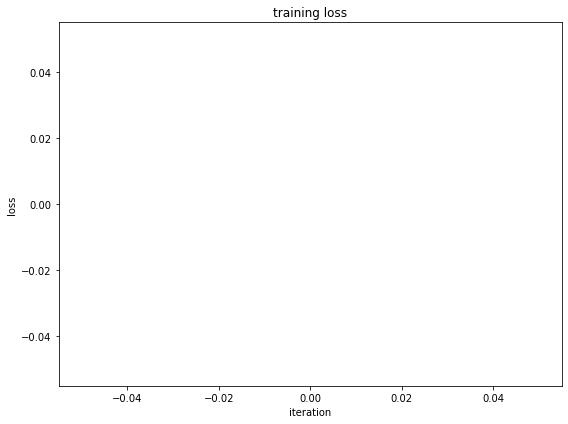

**************************************************
## [RESULT 04]
**************************************************


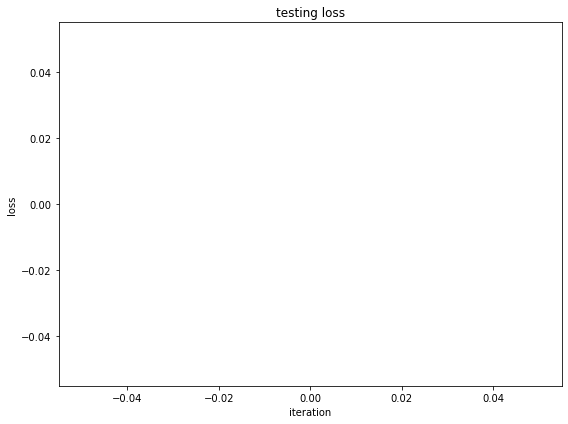

**************************************************
## [RESULT 05]
**************************************************


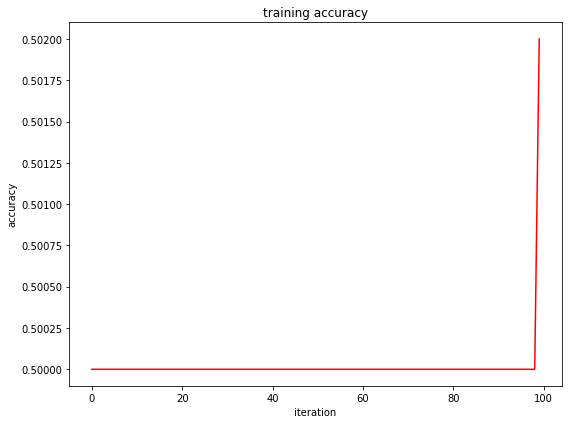

**************************************************
## [RESULT 06]
**************************************************


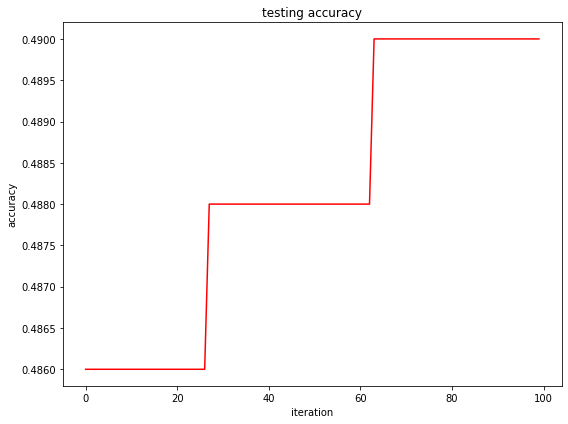

**************************************************
## [RESULT 07]
**************************************************


C:\Users\hajee\AppData\Local\Temp\ipykernel_10004\1526910731.py:32: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(XX,YY,zmesh,levels=1,color='black')


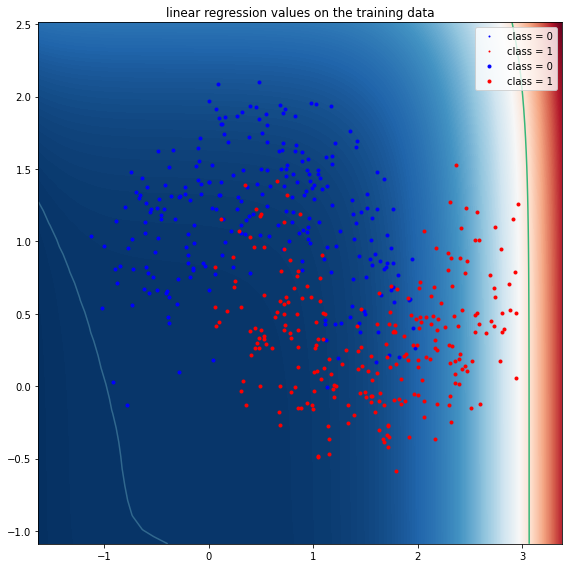

**************************************************
## [RESULT 08]
**************************************************


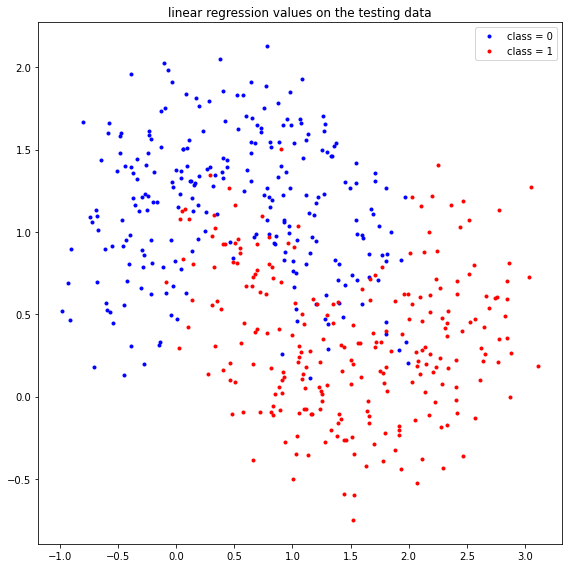

**************************************************
## [RESULT 09]
**************************************************


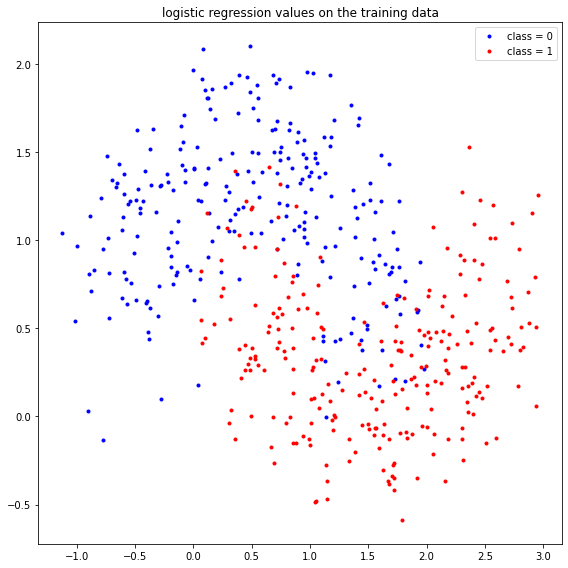

**************************************************
## [RESULT 10]
**************************************************


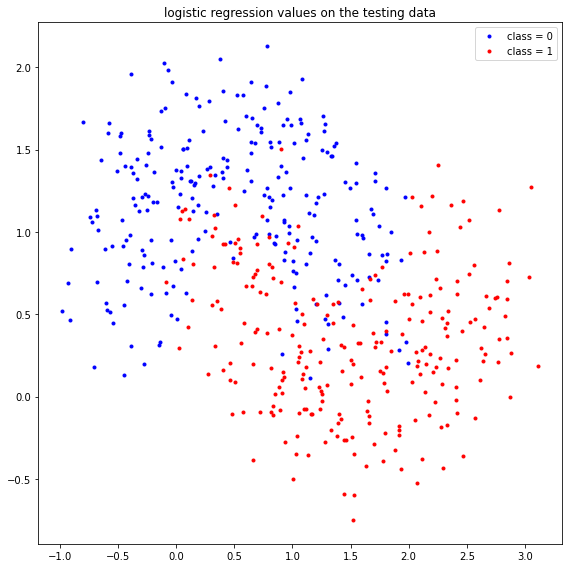

In [40]:
number_result = 10

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)